In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
tf.__version__
keras.__version__

2023-05-07 09:29:51.129438: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-07 09:29:51.131043: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-07 09:29:51.160260: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-07 09:29:51.160825: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 09:29:51.826545: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

'2.12.0'

In [3]:
#Loads fashion mnist from keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
# create validation, train and test set
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

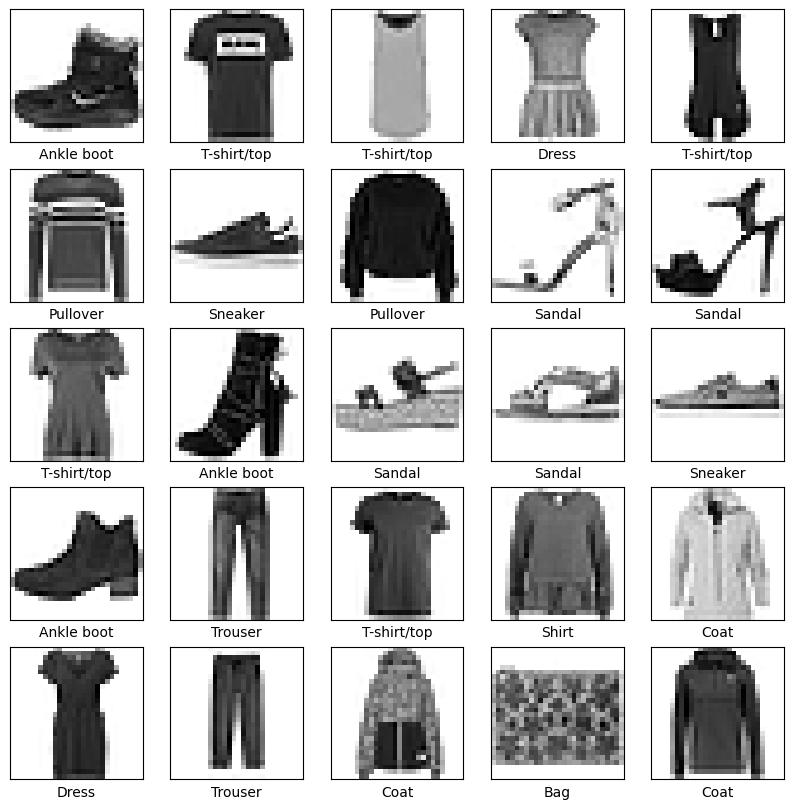

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]])
plt.show()

In [ ]:
### Creating the model

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
hidden1 = model.layers[1]

In [12]:
### Accessing any parameter of a given layer, it can be set with set_weights()
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

In [13]:
biases.shape

(300,)

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [15]:
history = model.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid))

Epoch 1/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7227 - accuracy: 0.7653 - val_loss: 0.7557 - val_accuracy: 0.7508
Epoch 2/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4910 - accuracy: 0.8306 - val_loss: 0.4478 - val_accuracy: 0.8526
Epoch 3/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4452 - accuracy: 0.8449 - val_loss: 0.4311 - val_accuracy: 0.8542
Epoch 4/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4188 - accuracy: 0.8523 - val_loss: 0.3963 - val_accuracy: 0.8688
Epoch 5/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3989 - accuracy: 0.8593 - val_loss: 0.4009 - val_accuracy: 0.8634
Epoch 6/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3825 - accuracy: 0.8648 - val_loss: 0.3787 - val_accuracy: 0.8688
Epoch 7/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3695 - accuracy: 0.8705 - val_loss: 0.3615 - val_accuracy:

1719/1719 [==============================] - 2s 1ms/step - loss: 0.1515 - accuracy: 0.9457 - val_loss: 0.3085 - val_accuracy: 0.8902
Epoch 58/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1495 - accuracy: 0.9460 - val_loss: 0.3026 - val_accuracy: 0.8946
Epoch 59/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1469 - accuracy: 0.9483 - val_loss: 0.3135 - val_accuracy: 0.8906
Epoch 60/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1449 - accuracy: 0.9483 - val_loss: 0.2939 - val_accuracy: 0.8994


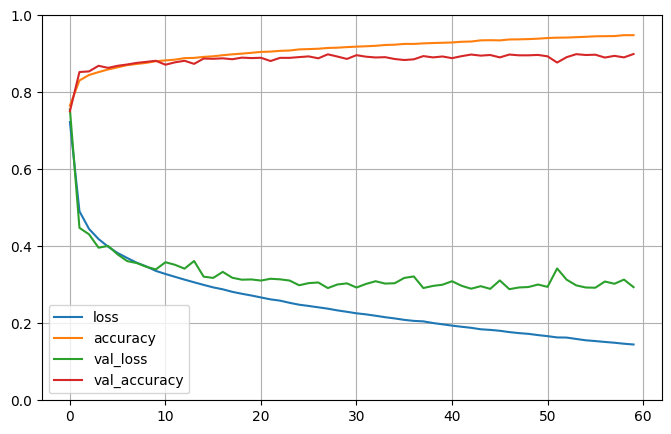

In [16]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
### Accuracy and loss values reported are related to the performance of the model on the TRAINING DATA
### During training, the model is optimized to minize the TRAINING LOSS, which is the average value
### of the loss function across all training examples in the current batch. The reported training accuracy
### is the proportion of training examples that were correctly classified by the model

### The validation set is used to evaluete the model`s generalization performance, i.e., how well the model
### can perform on new, unseeen data. The validation loss is the average loss value on the validation set.
### The reported VALIDATION ACCURACY is the proportion of validation examples that were CORRECTLY CLASSIFIED by
### the model

In [21]:
### It is noticeble that both the TRAINING ACCURACY and the VALIDATION ACCURACY steadily increase during training,
### while the TRAINING LOSS and the VALIDATION LOSS decrease. GOOD! Moreover, the VALIDATION CURVES are close
### to the training curves, which means that there is not too much overfitting.

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 627us/step - loss: 0.6091 - accuracy: 0.8910


[0.6090711951255798, 0.890999972820282]

In [26]:
### Using the model to make predictions

In [17]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 45ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

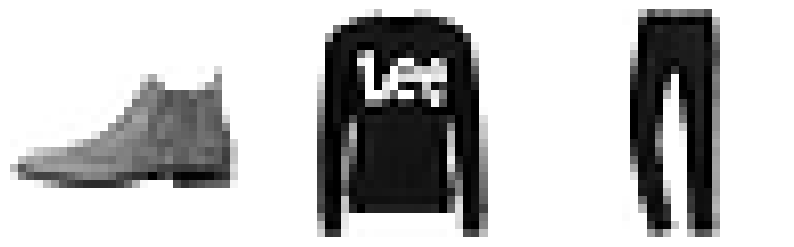

In [18]:
### Classes to be identified
fig, ax = plt.subplots(1, len(X_new), figsize=(10, 3))
for i, image in enumerate(X_new):
    ax[i].imshow(image, cmap='binary')
    ax[i].axis('off')
plt.show()

In [37]:
y_pred = np.argmax(y_proba, axis=1)
y_pred
np.array(class_names)[y_pred]

### Predicted images classes

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [42]:
y_new = y_test[:3]

array([9, 2, 1], dtype=uint8)

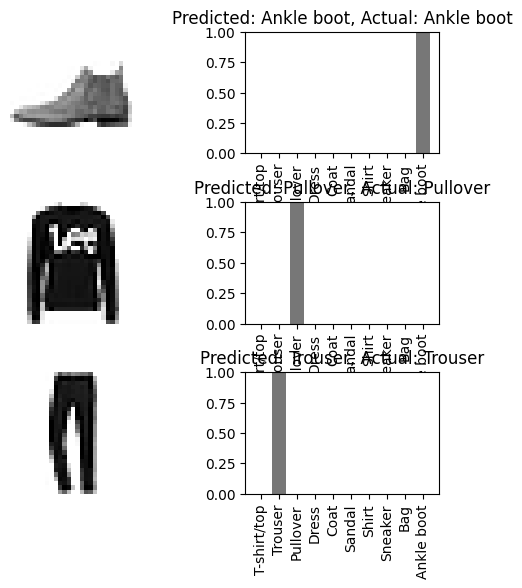

In [45]:
plt.figure(figsize=(6, 6))
for i in range(3):
    plt.subplot(3, 2, 2*i+1)
    plt.imshow(X_new[i], cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.subplot(3, 2, 2*i+2)
    plt.bar(range(10), y_proba[i], color="#777777")
    plt.ylim([0, 1])
    plt.xticks(range(10), class_names, rotation=90)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.title(f"Predicted: {class_names[y_pred[i]]}, Actual: {class_names[y_new[i]]}")
plt.show()